In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
mean = {'RM':data.RM.mean()}
data = data.fillna(mean)
# data = data.dropna(subset=['RM'],axis=0)

In [4]:
X = data.iloc[:,12].values
Y = data.iloc[:,13].values
X = X.reshape(-1,1)
X = X.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=30)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial = PolynomialFeatures(degree=2)

In [9]:
poly_x = polynomial.fit_transform(train_x)
poly_x1 = polynomial.fit_transform(test_x)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
LR = LinearRegression()

In [12]:
LR.fit(poly_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred_y = LR.predict(poly_x1)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
r2_score(test_y,pred_y)

0.7181063631485642

In [16]:
mean_squared_error(test_y,pred_y)

20.941381331908328

In [17]:
len(test_y)

152

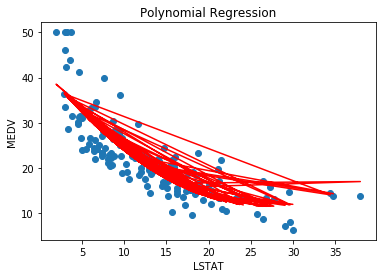

In [19]:
plt.scatter(test_x,test_y)
plt.plot(test_x,pred_y,color='red')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Polynomial Regression")
plt.show()